# Linear Regression

### Импорт всех необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
matplotlib.style.use("ggplot")
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

#### Импорт нужных данных  с помощью библиотеки pyreadstat


In [2]:
import pyreadstat
data, _ = pyreadstat.read_sav('C:\\Users\\Айдана\\Downloads\\housing.sav')
data.head()

,SQFT,AGE,FEATS,NEC,CUST,COR,PRICE
0,2650.0,13.0,7.0,1.0,1.0,0.0,205000.0
1,2600.0,NaN,4.0,1.0,1.0,0.0,208000.0
2,2664.0,6.0,5.0,1.0,1.0,0.0,215000.0
3,2921.0,3.0,6.0,1.0,1.0,0.0,215000.0
4,2580.0,4.0,4.0,1.0,1.0,0.0,199900.0


#### Удаляю столбец который содержит пустые значения и особо на нашу модель не имеет влияния

In [3]:
del data["AGE"]

#### Просмотр  самых базовых статистических данных

In [4]:
data.describe()

,SQFT,FEATS,NEC,CUST,COR,PRICE
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1653.854701,3.529915,0.666667,0.230769,0.188034,106273.504274
std,523.722802,1.405486,0.473432,0.423137,0.392420,38043.698543
min,837.000000,0.000000,0.000000,0.000000,0.000000,54000.000000
25%,1280.000000,3.000000,0.000000,0.000000,0.000000,78000.000000
50%,1549.000000,4.000000,1.000000,0.000000,0.000000,96000.000000
75%,1894.000000,4.000000,1.000000,0.000000,0.000000,120000.000000
max,3750.000000,8.000000,1.000000,1.000000,1.000000,215000.000000


#### Ниже описание наименований столбцов и их значение для полного понимания так как ,в датасете они укрощены для простоты использования

 Price = Selling price (in dollars)
 SquareFeet = Square feet of living space
 AgeYears = Age of home (years)
 Northeast = Located in northeast sector of city (Yes 1 or No 0)
 CustomBuild = Custom built (Yes 1 or No 0)
 CornerLot = Corner location (Yes 1 or No 0)

#### Для того чтобы более менее понять существует ли связь между данными,нарисовала точки данных в двумерном графике


##### Я взяла столбцы Square feet и Price

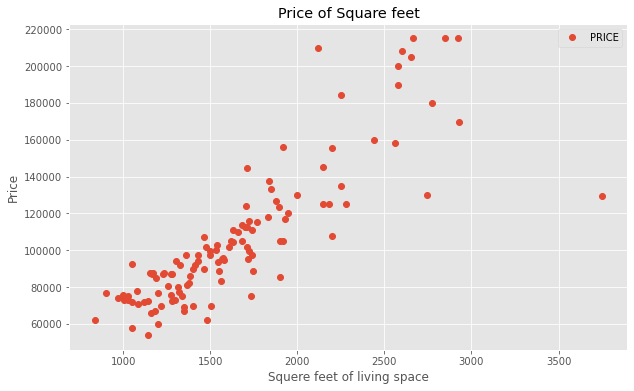

In [5]:
data.plot(x='SQFT', y='PRICE', style='o',figsize=(10,6))  
plt.title('Price of Square feet') 
plt.xlabel('Squere feet of living space')  
plt.ylabel('Price') 
plt.show()

####  И посмотрела среднюю цену

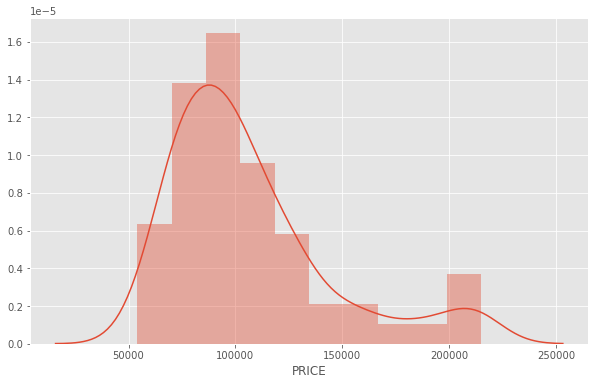

In [6]:
plt.figure(figsize=(10,6))
plt.tight_layout()
sns.distplot(data['PRICE'])

##### Следующий мой шаг это разделить данные на атрибуты и метки
Атрибуты это независимые переменные 
а Метки это зависимые переменные,в моем случае атрибутом будет квадратный фут жилой площади а меткой Цена за нее

In [7]:
X = data['SQFT'].values.reshape(-1,1)
y = data['PRICE'].values.reshape(-1,1)

Затем я  разделяю 80% данных на обучающий набор, а 20% данных - на набор тестов.
Переменная test_size - это то место, где мна самом деле нужно указать пропорцию тестового набора.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Теперь нужно обучить модель,для этого используем класс LinearRegression и с помощью его метода fit для данных обучения


In [9]:
%%time
from sys import getsizeof
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
p=getsizeof(regressor)
print("Занимает в памяти: {0} байтов".format(p))

Занимает в памяти: 48 байтов
Wall time: 7.86 s


Модель в основном находит лучшее значение для точки пересечения и наклона, в результате чего получается линия, которая наилучшим образом соответствует данным




In [10]:
print(regressor.intercept_)
print(regressor.coef_)

[8844.1942225]
[[58.83165312]]


Теперь, когда  обучили модель, пришло время сделать некоторые прогнозы. Для этого нужно использовать  тестовые данные и посмотреть, насколько точно модель предсказывает процентную оценку.

In [12]:
y_pred = regressor.predict(X_test)

Теперь сравним фактические выходные значения для X_test с прогнозируемыми значениями:

In [13]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,137500.0,116917.941002
1,93400.0,99621.434985
2,69900.0,91208.508589
3,60000.0,79324.514659
4,156000.0,121800.968211
5,54000.0,76029.942085
6,169500.0,181279.769515
7,87200.0,81148.295906
8,97500.0,88855.242465
9,158000.0,159629.721167


Также чтобы более наглядно увидеть мы можем визуализировать в гистограммы

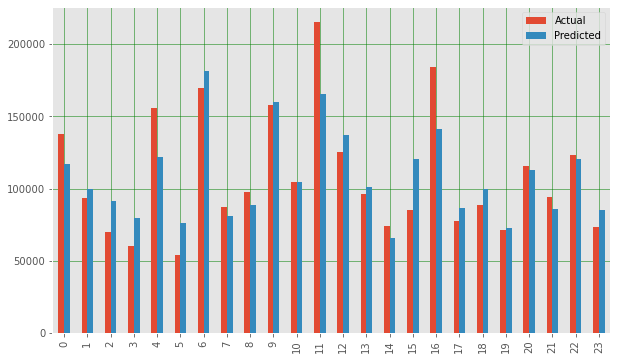

In [14]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Хотя наша модель не очень точна, прогнозируемые проценты близки к фактическим.

И наконец построю прямую линию с тестовыми данными

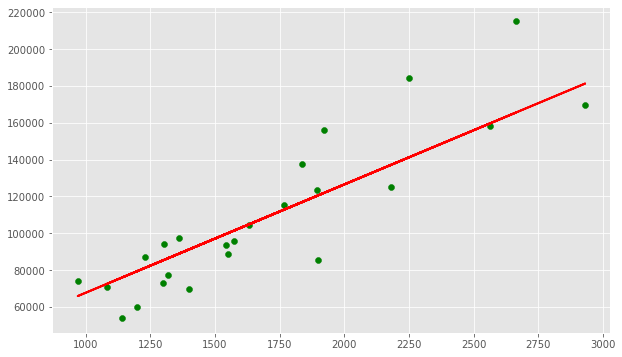

In [15]:
plt.figure(figsize=(10,6))
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.scatter(X_test, y_test,  color='green')
plt.show()

Последний шаг - оценить производительность алгоритма. Этот шаг особенно важен для сравнения того, насколько хорошо разные алгоритмы работают с конкретным набором данных. Для алгоритмов регрессии обычно используются три метрики оценки:

1.Средняя абсолютная ошибка(MAE) является средним значением абсолютного значения ошибок. Он рассчитывается как:
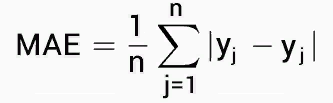


2. Средняя квадратическая ошибка(MSE) является средним квадратом ошибок и рассчитывается как:
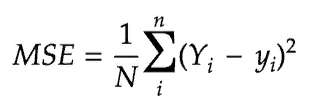

3. Среднеквадратическая ошибка(RMSE) - квадратный корень из среднего квадрата ошибок:
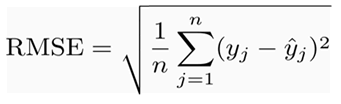

Библиотека Scikit-Learn поставляется с готовыми функциями, которые можно использовать, 
чтобы узнать MAE(средняя абсолютная ошибка),MSE(средняя квадратическая ошибка)и RMSE(среднеквадратическая ошибка).



In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14730.513988060498
Mean Squared Error: 392676070.895994
Root Mean Squared Error: 19816.05588647736


In [17]:
regressor.score(X_test,y_test)

0.7682006477017362

Значение среднеквадратичной ошибки составляет 19816, что составляет до 20% от среднего значения цены, то есть от 106273. Это означает, что модель была не очень точной, но все еще может делать достаточно хорошие прогнозы.

А метод score показывает точность в 76% процентов

# Logistic Regression

### Импорт данных и библиотек


##### 1-yes 1
##### 2-no  0

In [18]:
dataset = pd.read_csv("C:\\Users\\Айдана\\Downloads\\archive (2)\\heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Изучение данного набора данных, чтобы найти
###### Нечисловые значения
###### Отсутствует / Нулевое значение

In [19]:
print(dataset[~dataset.applymap(np.isreal).all(1)])
null_columns=dataset.columns[dataset.isnull().any()]
print(dataset[dataset.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Empty DataFrame
Columns: []
Index: []


##### Analysis

Проведя статистические и другие методы анализы найти или заметить
*перекос
*Выпадающие
*Среднее и Медиана
*Корреляция с использованием Pairplot.

describe() Этот анализ помогает определить, какой столбец сильно искажен, как выглядят хвосты, каковы средние, срединные и квартильные значения каждого столбца.

In [20]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


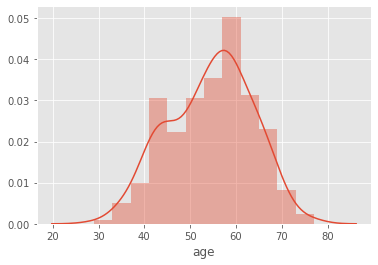

In [21]:
ax = sns.distplot(dataset['age'])

#### Посмотрим распределение по нашей цели(вероятность к сердечным приступам)

In [22]:
print('group by chance of heart attack: \n', dataset.groupby(['target']).count())

group by chance of heart attack: 
         age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
target                                                                         
0       138  138  138       138   138  138      138      138    138      138   
1       165  165  165       165   165  165      165      165    165      165   

        slope   ca  thal  
target                    
0         138  138   138  
1         165  165   165  


In [23]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6) fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11) the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

 ##### Чуть Больше половины подвержены к приступу но остальная нет

##### Теперь построим логистическую модель чтобы увидеть  насколько она сходится с данными из датасета

Для независимых данных выбираем все столбцы до нашей цели
и Для зависимой саму цель target
Разделяем данные по пропорциям  70:30 для обучения и тестового 


In [24]:
need_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = dataset[need_cols]  
y = dataset.target    

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [26]:
%%time
from sys import getsizeof
log_reg = LogisticRegression(max_iter=10000)

log_reg.fit(X_train,y_train)

y_pred=log_reg.predict(X_test)

p=getsizeof(regressor)
print("Занимает в памяти: {0} байтов".format(p))

Занимает в памяти: 48 байтов
Wall time: 1.27 s


#### Теперь нужно оценить неточночти модели с помощью матрицы путаницы или же Confusion Matrix . Основой матрицы неточностей является количество правильных и неправильных прогнозов, суммируемых по классам.


Тут мы можем увидеть матрицу путаницы в виде объекта массива. Размер этой матрицы составляет 2 * 2, потому что эта модель представляет собой двоичную классификацию. У нас есть два класса: 0 и 1. Диагональные значения представляют собой точные прогнозы, а недиагональные элементы - неточные прогнозы. На выходе 32 и 42 - фактические прогнозы, а 5 и 12 - неправильные прогнозы.

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[32, 12],
       [ 5, 42]], dtype=int64)

Визуализируем результаты модели в виде матрицы путаницы, используя matplotlib и seaborn. С помощью тепловой карты heatmap

Text(0.5, 257.44, 'Predicted label')

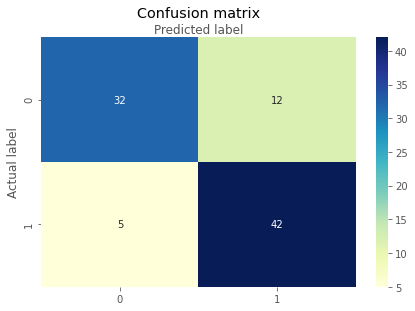

In [28]:
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Оценим модель, используя такие метрики оценки модели, как точность и отзыв.

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8131868131868132
Precision: 0.7777777777777778
Recall: 0.8936170212765957


Итак, у нас классификационный рейтинг 81%, что считается хорошей точностью.
Precision:  это точность, то есть насколько точна наша модель. Другими словами, мы можем сказать, когда модель делает прогноз, как часто он оказывается верным. В случае текущего прогноза, когда  модель логистической регрессии предсказывала, что пациенты будут страдать от диабета, у пациентов будет 78% времени.

Если у нас в данных будут пациенты с наклонностью к сердечному приступу, то эта  модель логистической регрессии может идентифицировать его в 89% случаев.

### Кривая ROC
Кривая рабочих характеристик приемника (ROC) представляет собой график зависимости истинно положительных результатов от ложноположительных. Он показывает компромисс между чувствительностью и специфичностью.

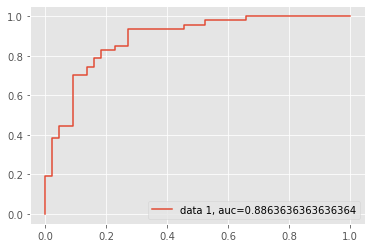

In [30]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Оценка AUC для случая составляет 0,88. Оценка AUC- 1 представляет собой идеальный классификатор, а 0,5 представляет собой бесполезный классификатор. Наш очень близок к 1.